<a href="https://colab.research.google.com/github/qzemily/Washington-Electric-Vehicle-Analysis/blob/main/WashingtonEVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Datasets/Electric_Vehicle_Population_Data.csv')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [ ]:
df.shape

(191407, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [ ]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
df.shape

(190989, 17)

In [ ]:
for columns in df.columns:
    print(f'{columns} has {df[columns].nunique()} unique values.')

VIN (1-10) has 11465 unique values.
County has 39 unique values.
City has 477 unique values.
State has 1 unique values.
Postal Code has 552 unique values.
Model Year has 17 unique values.
Make has 42 unique values.
Model has 145 unique values.
Electric Vehicle Type has 2 unique values.
Clean Alternative Fuel Vehicle (CAFV) Eligibility has 3 unique values.
Electric Range has 101 unique values.
Base MSRP has 31 unique values.
Legislative District has 49 unique values.
DOL Vehicle ID has 190972 unique values.
Vehicle Location has 552 unique values.
Electric Utility has 74 unique values.
2020 Census Tract has 1768 unique values.


There are 73 Electic Utility Providers for over 100,000 cars

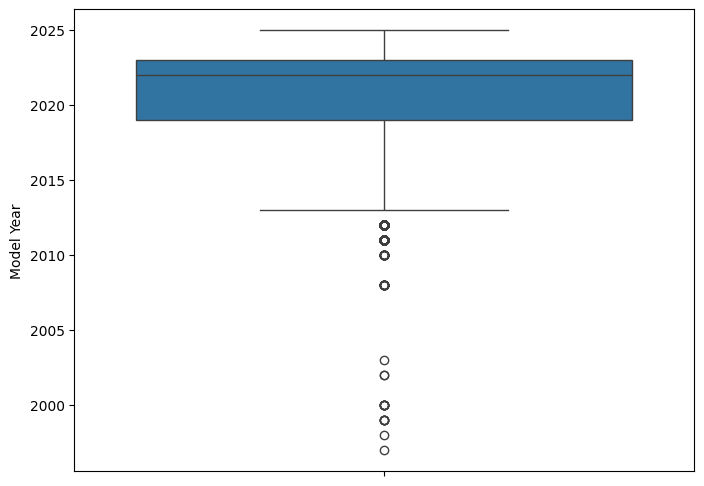

In [ ]:
#plt.figure(figsize=(8, 6))
sns.boxplot(df['Model Year'])
plt.show()

💡 **Which year has been the best for EV sales in Washignton❓**

2023 was the best year for EV sales in Washington with 60,004 EV sales, 31,955 more than in 2022

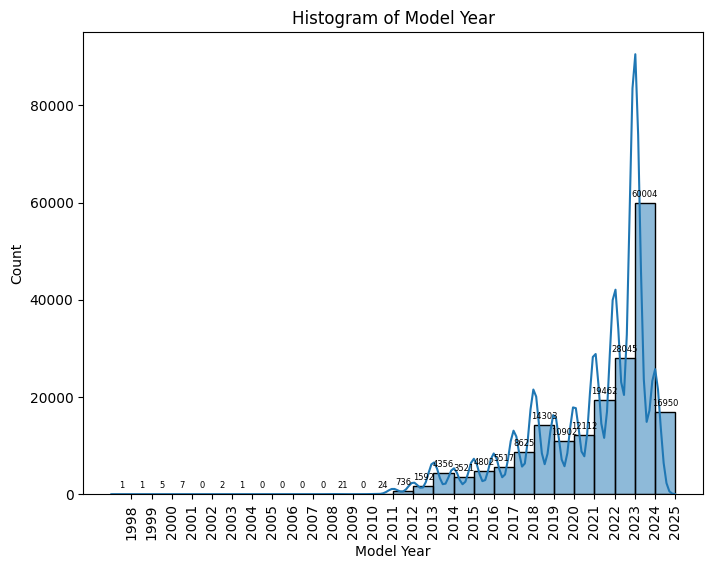

In [ ]:
plt.figure(figsize=(8, 6))
hist = sns.histplot(data = df, x ='Model Year', kde=True, binwidth= 1)
for container in hist.containers:
    hist.bar_label(container, fontsize=6, padding=3)
plt.xticks(range(1998, 2026), rotation='vertical')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title(f'Histogram of Model Year')
plt.show()

In [ ]:
#Remove year outliers
df = df.dropna(subset=['Model Year'])
df = df[df['Model Year'] > 2005]
df.shape

(190972, 17)

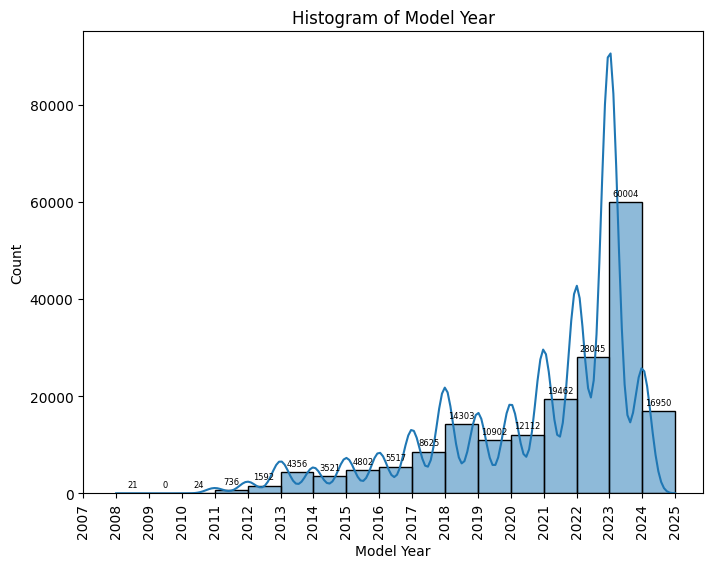

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data = df, x ='Model Year', kde=True, binwidth=1)
for container in ax.containers:
    ax.bar_label(container, fontsize=6, padding=3)
plt.xticks(range(2007, 2026), rotation='vertical')
plt.title(f'Histogram of Model Year')
plt.show()

💡 **What is the distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility in Washington from 2007 to 2024❓**


*   **35.92%** of EV are Clean Alternative Fuel Vehicle
Eligible
*  **10.70%** are not eligeble due to low battery range
*  **53.38%** are to be determined because the battery range has not been researched, this is because these models are newer.





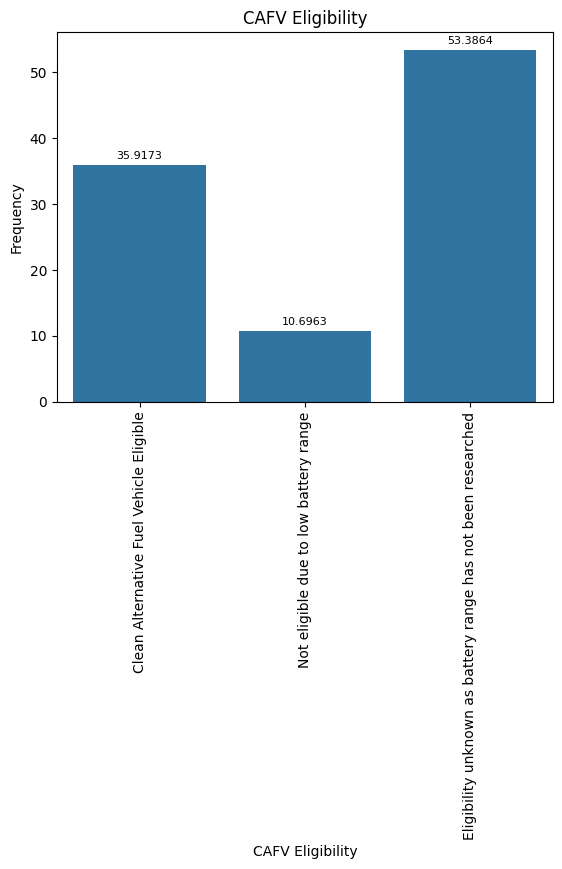

In [ ]:
ax= sns.countplot(data = df, x = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', stat= 'percent')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)

plt.xlabel('CAFV Eligibility')
plt.ylabel('Frequency')
plt.title('CAFV Eligibility')
plt.xticks(rotation=90)
plt.show()


<Figure size 800x600 with 0 Axes>

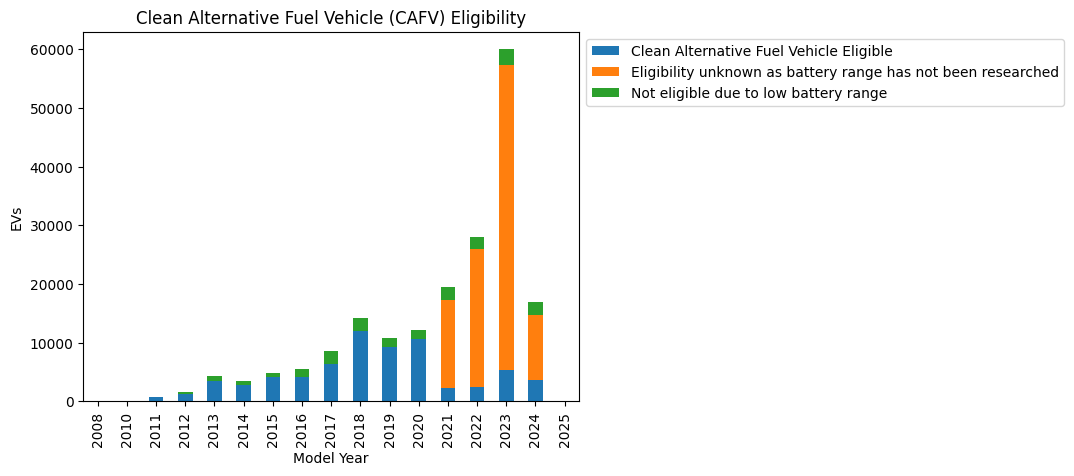

In [ ]:
df2 = df.groupby(['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Model Year'].count().unstack('Clean Alternative Fuel Vehicle (CAFV) Eligibility').fillna(0).sort_values(by='Model Year')
plt.figure(figsize=(8, 6))
df2[['Clean Alternative Fuel Vehicle Eligible','Eligibility unknown as battery range has not been researched', 'Not eligible due to low battery range']].plot(kind='bar', stacked=True)

plt.xlabel('Model Year')
plt.ylabel('EVs')
plt.title(f'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

💡 **What is the market breakdown between Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicle (PHEV) in Washington❓**



*  Battery Electric Vehicles are more prevalent in the market with approximately 150,000 compared to 41,594 hybrids.
*   Since 2018 the market for BEV has heavily increased.





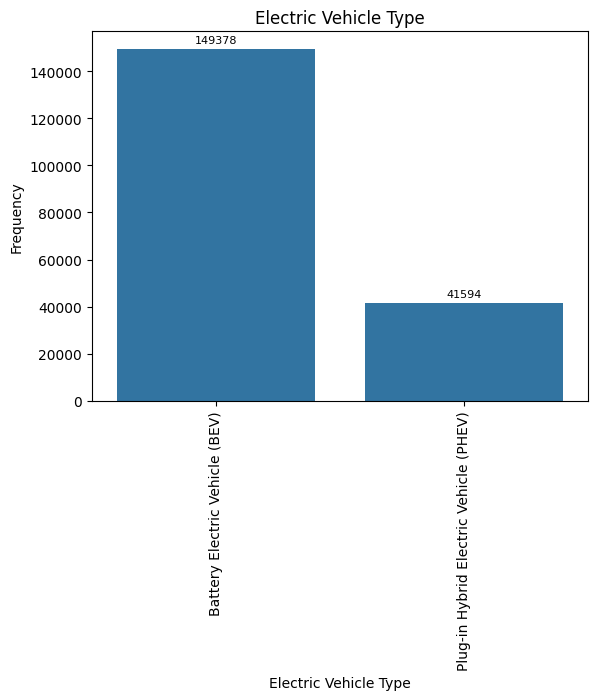

In [ ]:
ax = sns.countplot(data = df, x = 'Electric Vehicle Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)

plt.xlabel('Electric Vehicle Type')
plt.ylabel('Frequency')
plt.title('Electric Vehicle Type')
plt.xticks(rotation=90)

plt.show()


<Figure size 800x600 with 0 Axes>

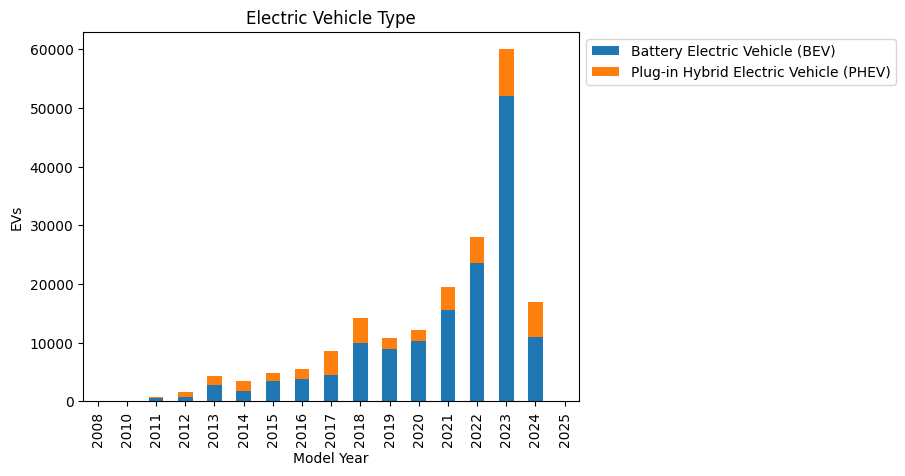

In [ ]:
df2 = df.groupby(['Model Year', 'Electric Vehicle Type'])['Model Year'].count().unstack('Electric Vehicle Type').fillna(0).sort_values(by='Model Year')

plt.figure(figsize=(8, 6))
df2[['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']].plot(kind='bar', stacked=True)


plt.xlabel('Model Year')
plt.ylabel('EVs')
plt.title(f'Electric Vehicle Type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

💡**What is the Electric Range Distribution of  EVs in Washignton❓**



*  The Electric Range is impaceted by the EV type. For instance, Battery Electric Vehicles tend to have a longer electric range than Plug-in Hybrid
*   BEVs range from 0 to 350 electric range miles.
*   PHEVs range from 0 to 150 electric range miles





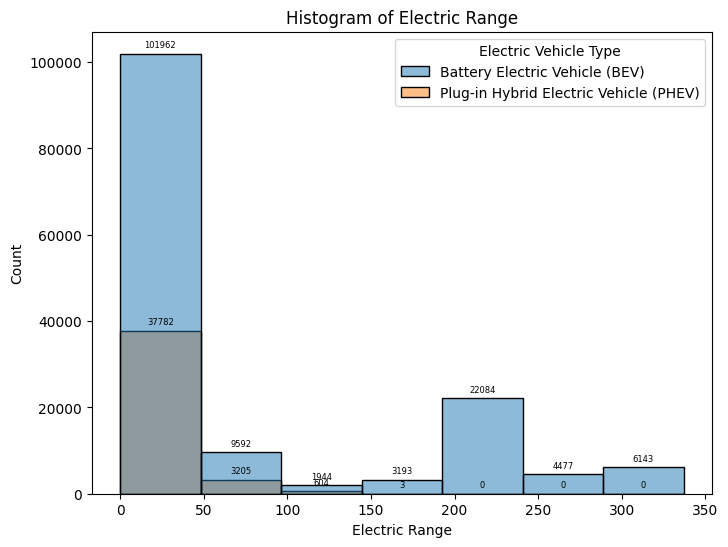

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data = df, x= 'Electric Range', binwidth=50, hue= 'Electric Vehicle Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=6, padding=7)
plt.title(f'Histogram of Electric Range')
plt.show()

🟩 **Clean Alerternative Eligible EVs Electric Range**


*  On average clean alternative BEVs range is 197 miles.
*  On average clean alternative PHEV range is 41 miles




In [ ]:
clean_alt = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']

In [ ]:
clean_BEV = clean_alt[clean_alt['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

In [ ]:
 clean_BEV.groupby('Electric Vehicle Type')['Electric Range'].describe()

,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Battery Electric Vehicle (BEV),47417.0,196.946749,73.167973,56.0,149.0,215.0,238.0,337.0


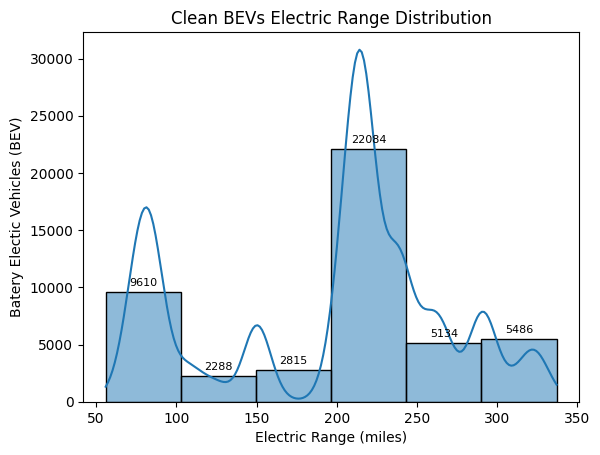

In [ ]:
ax = sns.histplot(data = clean_BEV, x = 'Electric Range', kde=True, binwidth=50)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)

plt.xlabel('Electric Range (miles)')
plt.ylabel('Batery Electic Vehicles (BEV)')
plt.title('Clean BEVs Electric Range Distribution')

plt.show()

In [ ]:
clean_plugin = clean_alt[clean_alt['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

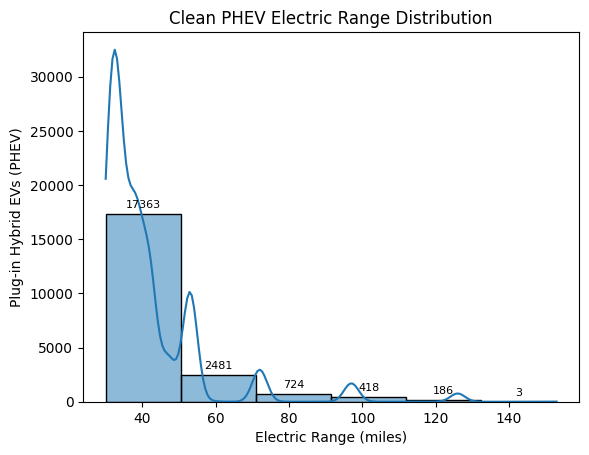

In [ ]:
ax = sns.histplot(data = clean_plugin, x = 'Electric Range', kde=True, binwidth=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)

plt.xlabel('Electric Range (miles)')
plt.ylabel('Plug-in Hybrid EVs (PHEV)')
plt.title('Clean PHEV Electric Range Distribution')


plt.show()

In [ ]:
clean_plugin.groupby('Electric Vehicle Type')['Electric Range'].describe()

,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Plug-in Hybrid Electric Vehicle (PHEV),21175.0,41.194664,14.691529,30.0,32.0,38.0,42.0,153.0


🚘 **EV Makers and Models**


*   The top EV makers in Washignton are Tesla with 84,464 followed by Chevrolet with 14,292.
*   The most popular EV models are Tesla's Model Y with 39,443 followed by model 3 with 30,884



<ipython-input-45-f091070a2346>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_makers.index, y=top_makers.values, palette= custom_palette)


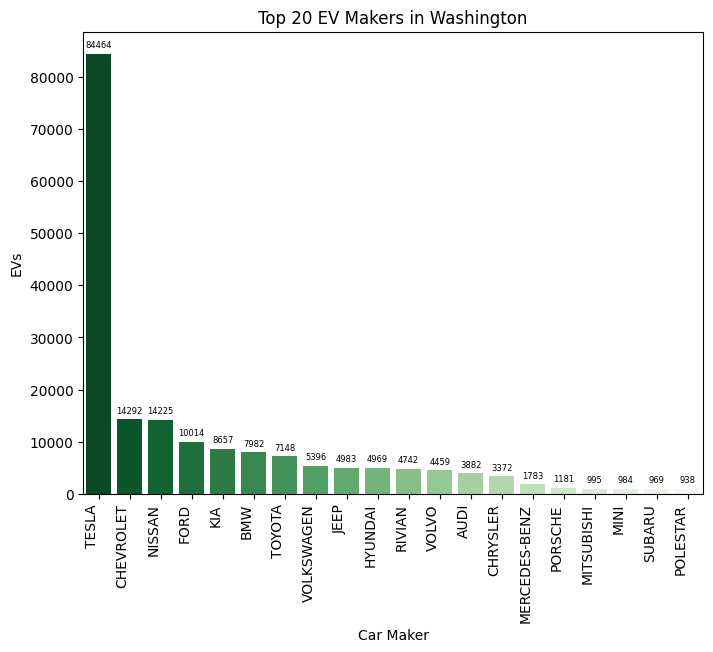

In [ ]:
top_makers = df['Make'].value_counts().head(20)

custom_palette = sns.color_palette('Greens', n_colors=20)[::-1]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_makers.index, y=top_makers.values, palette= custom_palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=6, padding=3)

plt.xlabel('Car Maker')
plt.ylabel('EVs')
plt.title('Top 20 EV Makers in Washington')


plt.xticks(rotation=90, ha='right')
plt.show()

<ipython-input-46-a85258a0e611>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_makers.index, y=bottom_makers.values, palette= custom_palette)


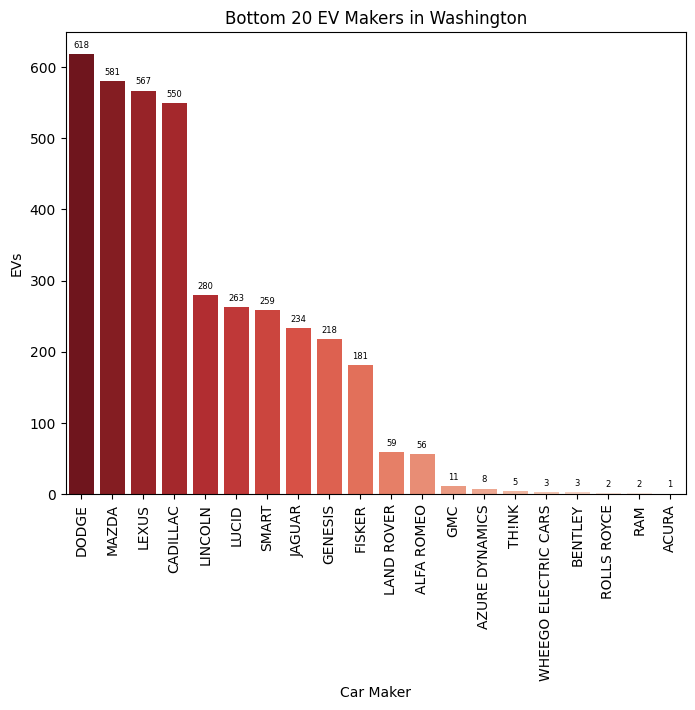

In [ ]:
bottom_makers = df['Make'].value_counts().tail(20)

custom_palette = sns.color_palette('Reds', n_colors=20)[::-1]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=bottom_makers.index, y=bottom_makers.values, palette= custom_palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=6, padding=3)

plt.xlabel('Car Maker')
plt.ylabel('EVs')
plt.title('Bottom 20 EV Makers in Washington')

plt.xticks(rotation=90)
plt.show()

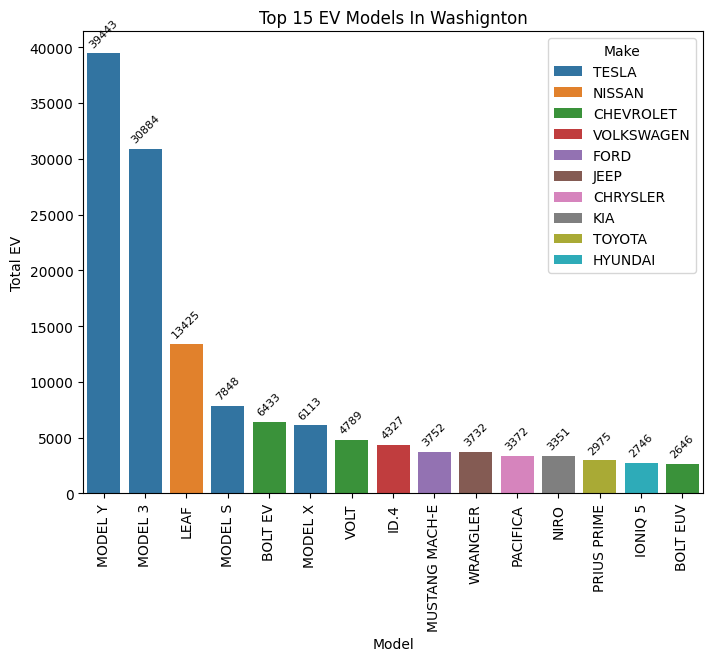

In [ ]:
top_models = df[['Model', 'Make']].value_counts().head(15).reset_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(data = top_models, x='Model', y= 'count', hue ='Make')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3, rotation=45)

plt.xlabel('Model')
plt.ylabel('Total EV')
plt.title('Top 15 EV Models In Washignton')
plt.xticks(rotation=90)
plt.show()

🏙 **Counties and Cities**

💡 What are the counties with most EVs in Washington?


1.   King County: 99,072
2.   Snohomish: 22,642
3.   Pierce: 14,930
4.   Clark: 11,328
5.   Thurston: 6,968

💡 What are the cities with most EVs in Washington?

1.   Seattle: 31,435
2.   Bellevue:9,581
3.   Redmond: 6,883
4.   Vancouver: 6,744
5.   Bothell: 6,278






<ipython-input-171-635460953c00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_counties.index, y=top_counties.values, palette= custom_palette)


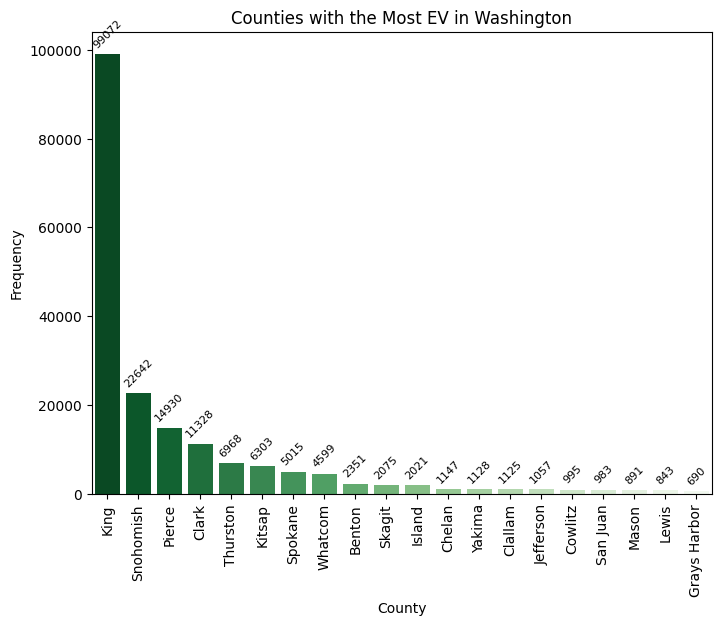

In [ ]:
top_counties = df['County'].value_counts().head(20)

custom_palette = sns.color_palette('Greens', n_colors=20)[::-1]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=top_counties.index, y=top_counties.values, palette= custom_palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3, rotation=45)

plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Counties with the Most EV in Washington')
plt.xticks(rotation=90)
plt.show()

<ipython-input-170-b1ff095bddfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette= custom_palette)


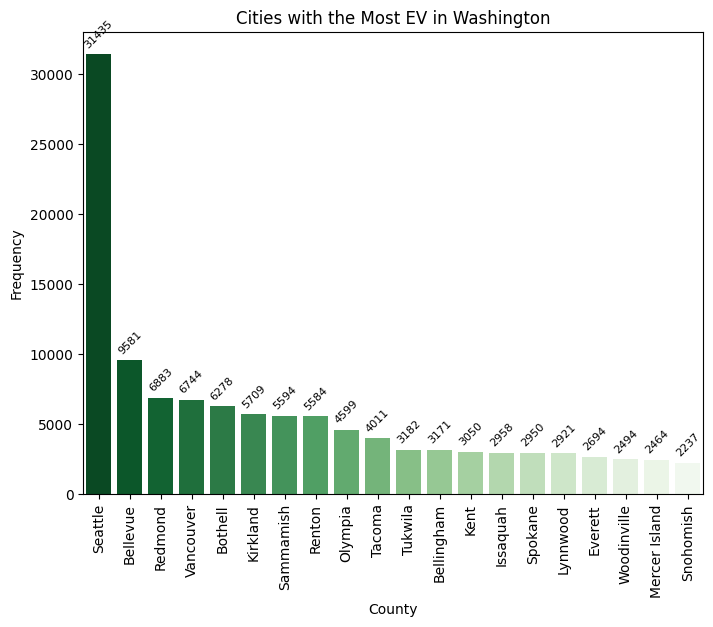

In [ ]:
top_cities = df['City'].value_counts().head(20)

custom_palette = sns.color_palette('Greens', n_colors=20)[::-1]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette= custom_palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3, rotation=45)

plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Cities with the Most EV in Washington')
plt.xticks(rotation=90)
plt.show()